# Assignment 1 (part I): Line Fitting and other "stuff"

In [1]:
%matplotlib notebook

import numpy as np
import numpy.linalg as la
import matplotlib
import matplotlib.pyplot as plt
from skimage.measure import ransac

#### TO IMPLEMENT: complete (fix) the code in the following cell. Note that solution has 2-3 lines. You can use $svd$ function in $la$ and/or standard matrix operations from $np$.

In [2]:
class LeastSquareLine:

    def __init__(self):
        self.a = 0.0
        self.b = 0.0
        
    def estimate(self, points2D):
        B = points2D[:,1]
        A = np.copy(points2D)
        A[:,1] = 1.0 
            
        params = np.linalg.pinv(A)
        params = np.matmul(params, B)
        # Vector B and matrix A are already defined. Change code below
        self.a = params[0]
        self.b = params[1]
        return True
        
    def predict(self, x): return (self.a * x) + self.b
    
    def predict_y(self, x): return (self.a * x) + self.b
            
    def residuals(self, points2D):
        return points2D[:,1] - self.predict(points2D[:,0])
    
    def line_par(self):
        return self.a, self.b

#### Working code below generates (simulates) data points in ${\cal R}^2$ corresponding to noisy observations of a line.

<IPython.core.display.Javascript object>


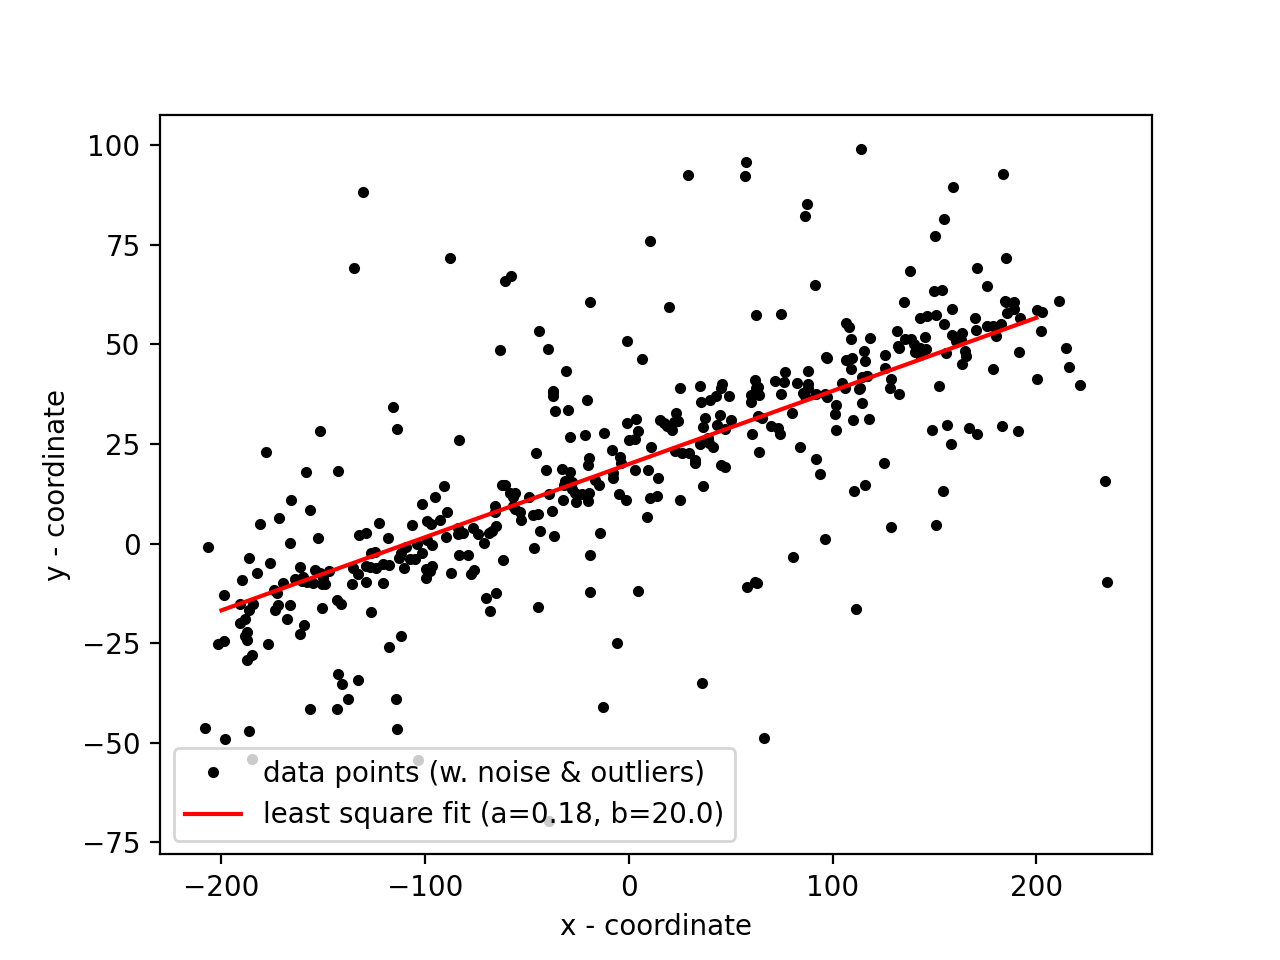

In [16]:
np.random.seed(seed=1)

# parameters for "true" line y = a*x + b
a, b = 0.2, 20.0

# x-range of points [x1,x2]
x_start, x_end = -200.0, 200.0

# generate "idealized" line points
x = np.arange(x_start,x_end)
y = a * x + b               
data = np.column_stack([x, y])    # staking data points into (Nx2) array

# add gaussian pertubations to generate "realistic" data points (noisy line observations)
noise = np.random.normal(size=data.shape) # generating Gaussian noise (variance 1) for each data point (rows in 'data')
data += 5 * noise
data[::2] += 10 * noise[::2]  # every second point adds noise with variance 5
data[::4] += 20 * noise[::4] # every fourth point adds noise with variance 20


fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
ax.set_xlabel('x - coordinate')
ax.set_ylabel('y - coordinate')
ax.legend(loc='lower left')
plt.show()

In [17]:
LSline = LeastSquareLine() # uses class implemented in Problem 2
print (LSline.estimate(data))
a_ls, b_ls = LSline.line_par()

# visualizing estimated line
ends = np.array([x_start,x_end])
ax.plot(ends, LSline.predict(ends), '-r', label='least square fit (a={:4.2f}, b={:4.1f})'.format(a_ls,b_ls))
ax.legend(loc='lower left')
plt.show()

True


<IPython.core.display.Javascript object>


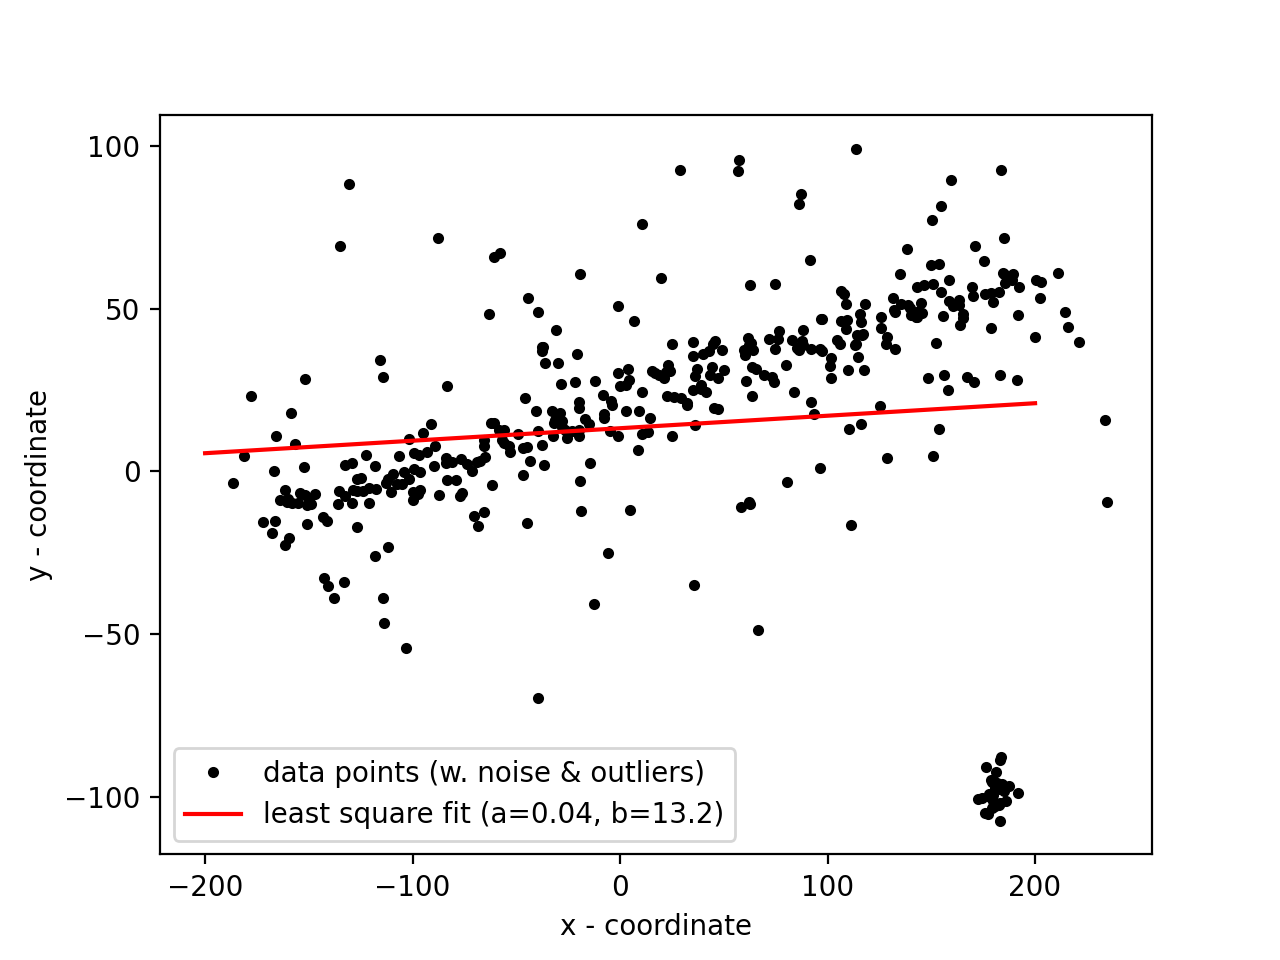

In [18]:
# add outliers
faulty = np.array(30 * [(180., -100)])  # (30x2) array containing 30 rows [180,-100]  (points)
faulty += 5 * np.random.normal(size=faulty.shape)  # adding Gaussian noise to these points
data[:faulty.shape[0]] = faulty   # replacing the first 30 points in data with faulty (outliers)


fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
ax.set_xlabel('x - coordinate')
ax.set_ylabel('y - coordinate')
ax.legend(loc='lower left')
plt.show()

True


<IPython.core.display.Javascript object>


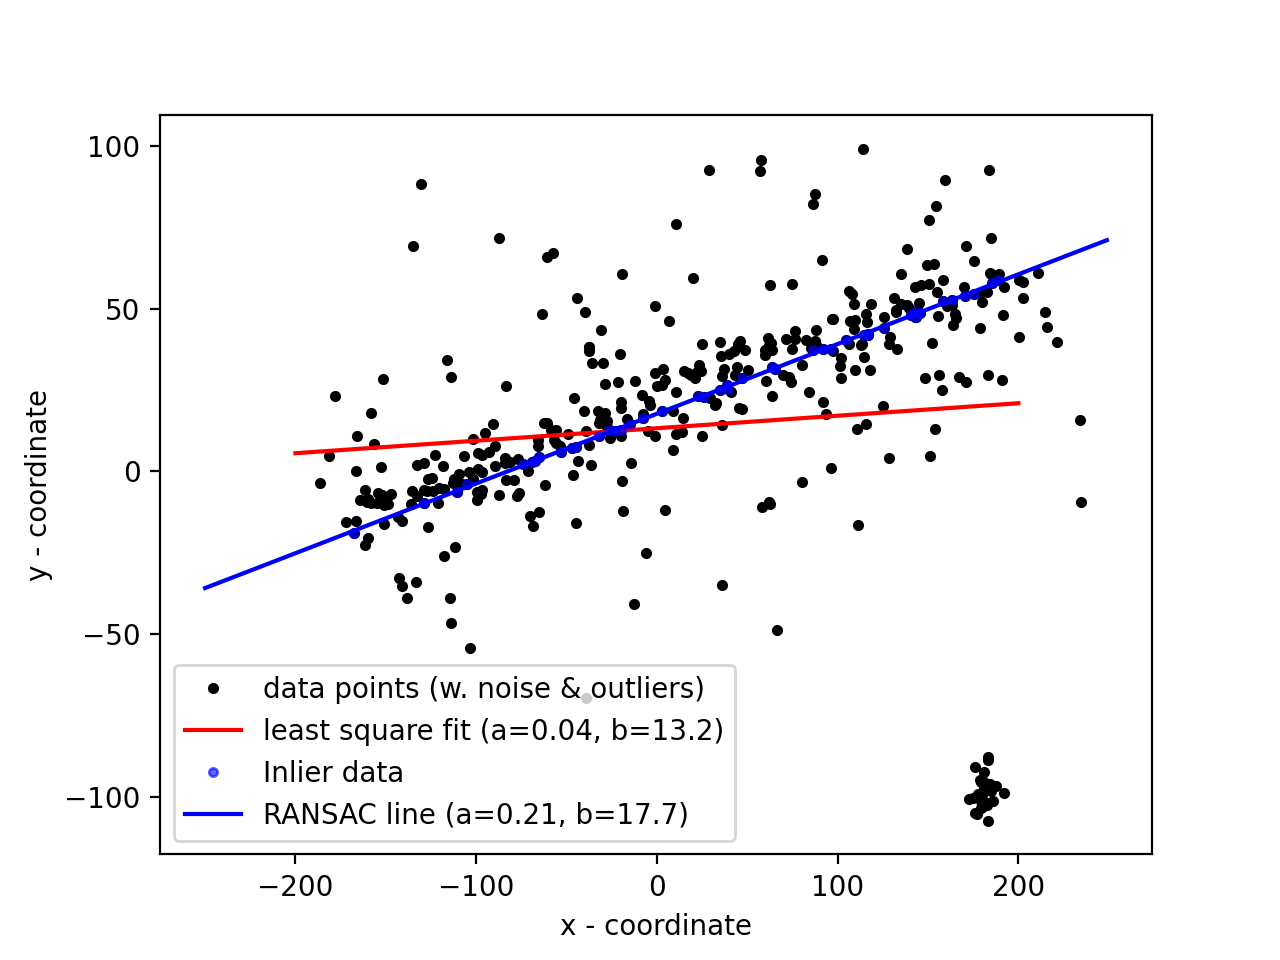

In [20]:
LSline = LeastSquareLine() # uses class implemented in Problem 2
print (LSline.estimate(data))
a_ls, b_ls = LSline.line_par()



fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
ax.set_xlabel('x - coordinate')
ax.set_ylabel('y - coordinate')
ax.legend(loc='lower left')

# visualizing estimated line
ends = np.array([x_start,x_end])
ax.plot(ends, LSline.predict(ends), '-r', label='least square fit (a={:4.2f}, b={:4.1f})'.format(a_ls,b_ls))
ax.legend(loc='lower left')
plt.show()

<IPython.core.display.Javascript object>


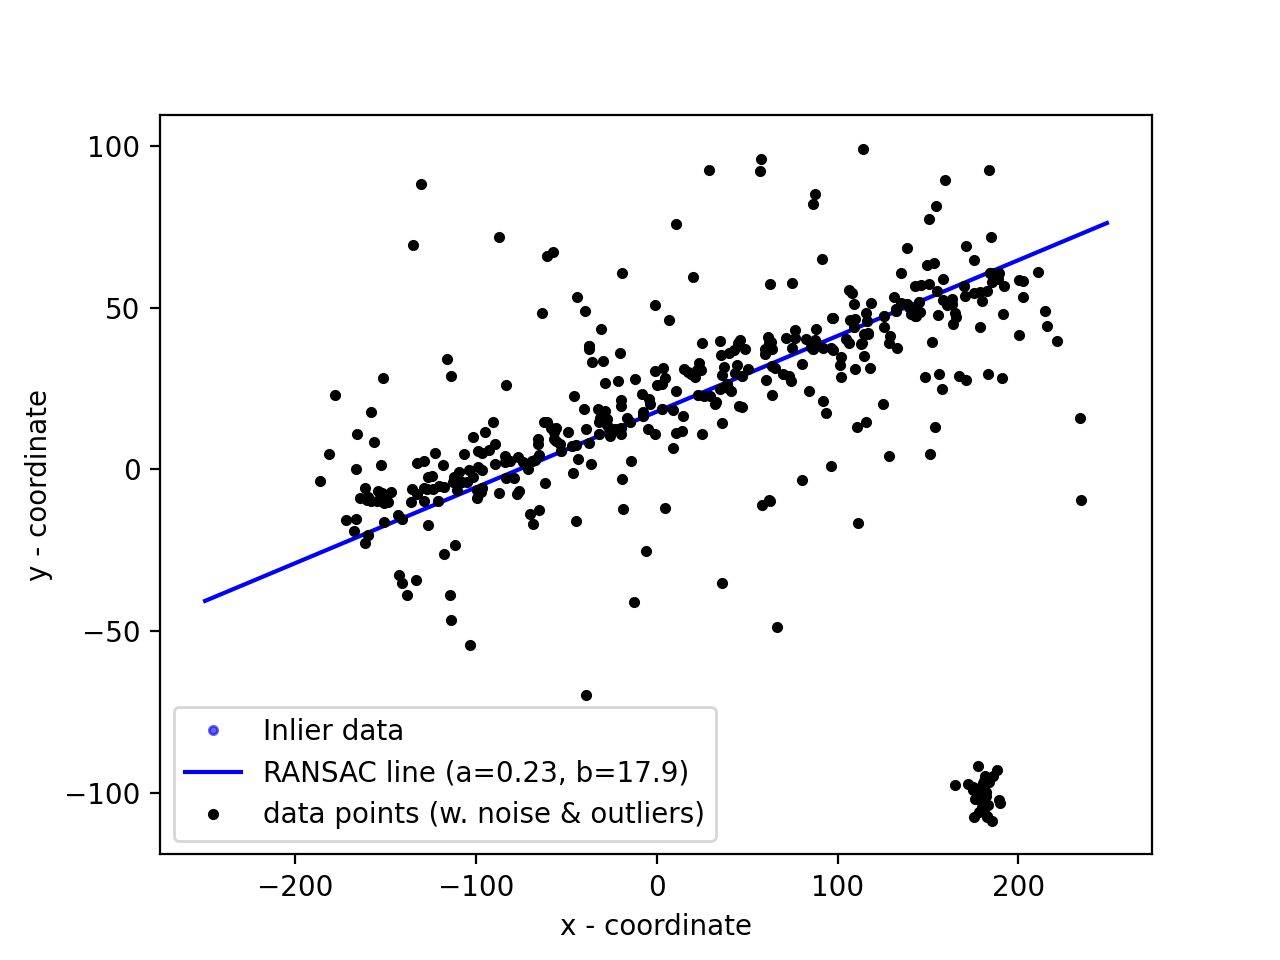

In [23]:
# robustly fit line using RANSAC algorithm

calculatedK = 77

model_robust, inliers = ransac(data, LeastSquareLine, min_samples=2, residual_threshold=1, max_trials=calculatedK)


a_rs, b_rs = model_robust.line_par()

# generate coordinates of estimated models
line_x = np.arange(-250, 250)
line_y_robust = model_robust.predict_y(line_x)

fig, ax = plt.subplots()
ax.plot(data[inliers, 0], data[inliers, 1], '.b', alpha=0.6, label='Inlier data')
ax.plot(line_x, line_y_robust, '-b', label='RANSAC line (a={:4.2f}, b={:4.1f})'.format(a_rs,b_rs))
ax.legend(loc='lower left')



ax.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
ax.set_xlabel('x - coordinate')
ax.set_ylabel('y - coordinate')
ax.legend(loc='lower left')

plt.show()



<IPython.core.display.Javascript object>


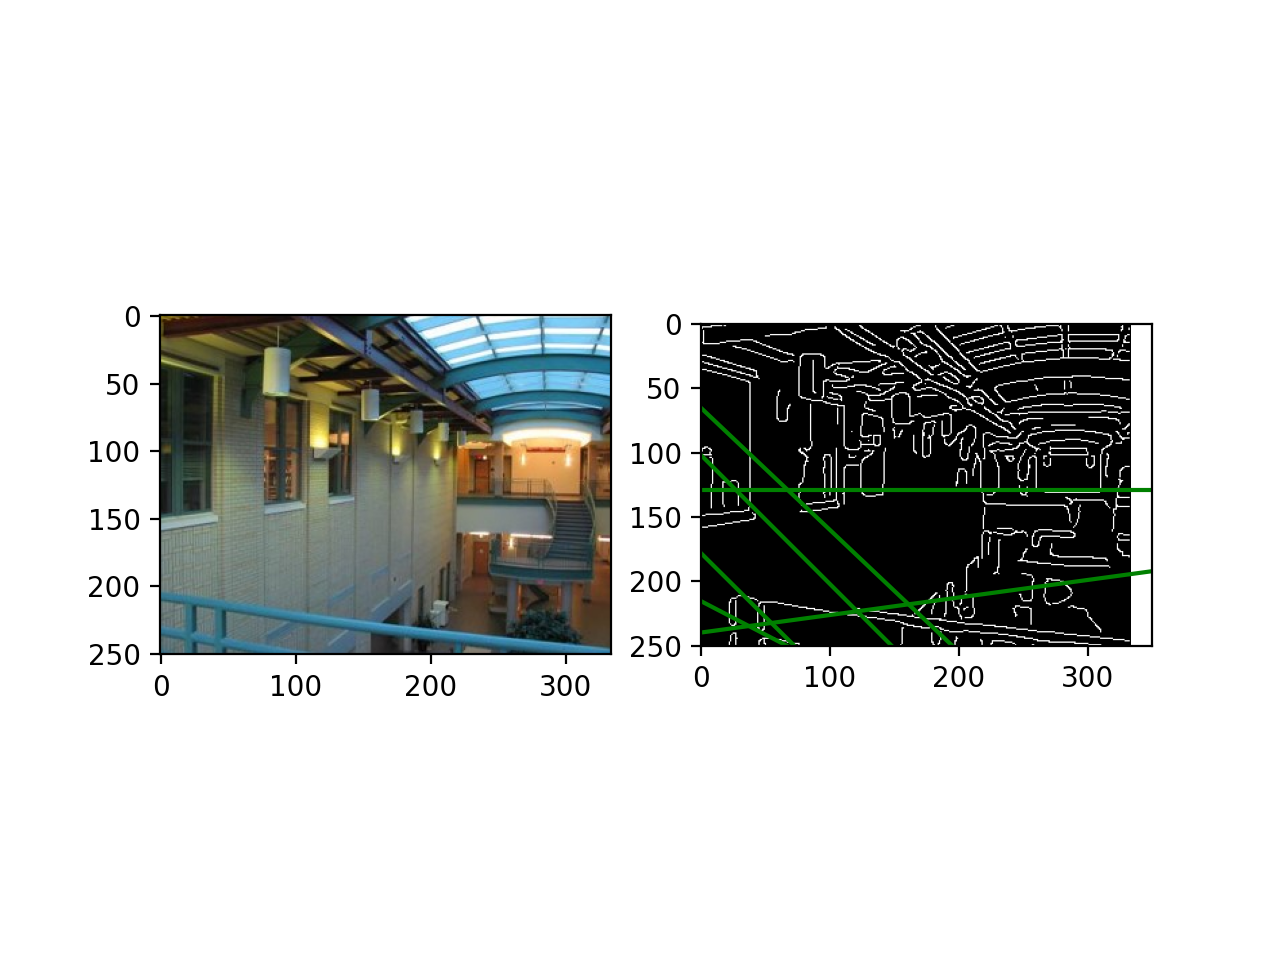

In [9]:
# parameters for "true" lines y = a*x + b
a2, b2 = 0.1, -10.0

# generate "idealized" line points
y2 = a2 * x + b2
data2 = np.column_stack([x, y2])    # staking data points into (Nx2) array

# add gaussian pertubations to generate "realistic" line data
noise = np.random.normal(size=data.shape) # generating Gaussian noise (variance 1) for each data point (rows in 'data')
data2+= 5 * noise
data2[::2] += 10 * noise[::2]  # every second point adds noise with variance 5
data2[::4] += 20 * noise[::4] # every fourth point adds noise with variance 20

data = np.concatenate((data,data2)) # combining with previous data

fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
ax.set_xlabel('x - coordinate')
ax.set_ylabel('y - coordinate')
ax.legend(loc='lower left')
plt.show()

In [10]:
# robustly fit line using RANSAC algorithm

numOUtliers = np.size(a) - np.count_nonzero(a)
calculatedK = 70

model_robust, inliers = ransac(data, LeastSquareLine, min_samples=2, residual_threshold=0.1, max_trials=calculatedK)
a_rs, b_rs = model_robust.line_par()

# generate coordinates of estimated models
line_x = np.arange(-250, 250)
line_y_robust = model_robust.predict_y(line_x)

#fig, ax = plt.subplots()
ax.plot(data[inliers, 0], data[inliers, 1], '.b', alpha=0.6, label='Inlier data')
ax.plot(line_x, line_y_robust, '-b', label='RANSAC line 1 (a={:4.2f}, b={:4.1f})'.format(a_rs,b_rs))
ax.legend(loc='lower left')
plt.show()





In [11]:
# robustly fit line using RANSAC algorithm

calculatedK = 70
newData = data[np.invert(inliers)]
newData
model_robust, inliers = ransac(newData, LeastSquareLine, min_samples=2, residual_threshold=0.1, max_trials=calculatedK)
a_rs, b_rs = model_robust.line_par()
# generate coordinates of estimated models
line_x = np.arange(-250, 250)
line_y_robust = model_robust.predict_y(line_x)

#fig, ax = plt.subplots()
ax.plot(newData[inliers, 0], newData[inliers, 1], '.b', alpha=0.6, label='Inlier data')
ax.plot(line_x, line_y_robust, '-g', label='RANSAC line 2 (a={:4.2f}, b={:4.1f})'.format(a_rs,b_rs))
ax.legend(loc='lower left')
plt.show()




In [12]:
import matplotlib.image as image
from skimage import feature
from skimage.color import rgb2gray

im = image.imread("images/CMU_left.jpg")
imgray = rgb2gray(im)
can = feature.canny(imgray, 2.0)

plt.figure(4,figsize = (10, 4))
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
plt.imshow(can,cmap="gray")
plt.show()

/var/folders/vz/5mkcn1n132g891vqgfxk5mwc0000gn/T/ipykernel_15088/3144973068.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


In [13]:

# NOTE 1: write your code using a function that takes K as a parameter. 
# NOTE 2: Present visual results for some value of K 
# NOTE 3: Your code should visually show detected lines in a figure 
#         over the image (either the original one or over the Canny edge mask)
# NOTE 4: You may need to play with parameters of function ransac 
#         (e.g. threshold and number of sampled models "max_trials")
#         Also, you can introduce one extra parameter for the minimum number of inliers 
#         for accepting ransac-detected lines.

# NOTE: "can" in the cell above is a binary mask with True and False values, e.g. 


def findKLines( K = 5 ):
    # robustly fit line using RANSAC algorithm
    newData = np.argwhere(can).copy()
    
    calculatedK = 76
    
    while K >= 0:
        model_robust, inliers = ransac(newData, LeastSquareLine, min_samples=2, residual_threshold=0.1, max_trials=calculatedK)
        a_rs, b_rs = model_robust.line_par()
        # generate coordinates of estimated models
        line_x = np.arange(0, 350)
        line_y_robust = model_robust.predict_y(line_x)

        
        #plt.plot(newData[inliers, 0], newData[inliers, 1], '.b', alpha=0.6, label='Inlier data')
        plt.plot(line_x, line_y_robust, '-g', label='RANSAC line 2 (a={:4.2f}, b={:4.1f})'.format(a_rs,b_rs))
        #plt.legend(loc='lower left')
        plt.xlim(0, 350)
        
        plt.ylim(250, 0)
        plt.show()
        newData = newData[np.invert(inliers)]
        K = K - 1



print (can[20,30])
print (can[146,78])

False
True


In [14]:
findKLines(5)